# Working with Packages

---

Starting Julia loads Julia kernel and `Base` module. The `Base` (core) is kept small and all other functionality is accessible through packages which need to be individually included by the user.

Currently there are __1500+__ registered packages listed at 
[Julia Package Listing](http://pkg.julialang.org/).

In this notebook, we demonstrate how to use packages.

## Prerequisites

Read section [Packages](https://docs.julialang.org/en/stable/manual/packages/) of the Julia manual (15 min). 


## Competences 

The reader should be able to install and use registered and unregistered packages and create own packages.


## Credits 

Some examples are taken from [The Julia Manual](https://docs.julialang.org/en/stable/).

---

## `Pkg.status()`

In [1]:
?Pkg.status()

```
status()
```

Prints out a summary of what packages are installed and what version and state they're in.


In [2]:
# This is slow due to communication with GitHub
Pkg.status()

14 required packages:
 - Arrowhead                     0.0.1+             master
 - Gadfly                        0.6.5
 - GraphPlot                     0.2.0
 - GraphViz                      0.1.1              master
 - Graphs                        0.9.0
 - IJulia                        1.7.0
 - IJuliaPortrayals              0.0.4
 - Interact                      0.7.1
 - LightGraphs                   0.12.0
 - MetaGraphs                    0.4.0
 - SimpleWeightedGraphs          0.4.0
 - SpecialMatrices               0.1.3+             master
 - ToeplitzMatrices              0.3.0
 - Winston                       0.13.2
77 additional packages:
 - AbstractFFTs                  0.3.1
 - AxisAlgorithms                0.2.0
 - BinDeps                       0.8.7              master
 - BinaryProvider                0.2.8
 - BufferedStreams               0.4.0
 - Cairo                         0.5.1+             master (dirty)
 - Calculus                      0.2.2
 - CodecZlib             

## `Pkg.add()`

This command adds registered package from [Julia Package Listing](http://pkg.julialang.org/).
Adding the package downloads the package source code (and all other required packages) to your `.julia/v0.6/` directory.

GitHub repository names of registered Julia packages always end with the extension `.jl`, which is ommited in `Pkg.add()` command. The example below installs the package from the GitHub repository https://github.com/JuliaLang/LightGraphs.jl.

N.B. There are other registered packages dealing with graphs, please check them out.

In [3]:
?Pkg.add

```
add(pkg, vers...)
```

Add a requirement entry for `pkg` to `Pkg.dir("REQUIRE")` and call `Pkg.resolve()`. If `vers` are given, they must be `VersionNumber` objects and they specify acceptable version intervals for `pkg`.


In [4]:
# Pkg.add("LightGraphs")

In [5]:
# This is Julia's default directory
# Windows version:  a=readdir("/Users/Ivan/.julia/v0.6")
a=readdir("/home/slap/.julia/v0.6")

96-element Array{String,1}:
 "AbstractFFTs"        
 "Arrowhead"           
 "AxisAlgorithms"      
 "BinaryProvider"      
 "BinDeps"             
 "BufferedStreams"     
 ".cache"              
 "Cairo"               
 "Calculus"            
 "CodecZlib"           
 "Colors"              
 "ColorTypes"          
 "CommonSubexpressions"
 ⋮                     
 "SpecialMatrices"     
 "StaticArrays"        
 "StatsBase"           
 "StatsFuns"           
 "Tk"                  
 "ToeplitzMatrices"    
 "TranscodingStreams"  
 ".trash"              
 "URIParser"           
 "Winston"             
 "WoodburyMatrices"    
 "ZMQ"                 

In [6]:
println(a)

String["AbstractFFTs", "Arrowhead", "AxisAlgorithms", "BinaryProvider", "BinDeps", "BufferedStreams", ".cache", "Cairo", "Calculus", "CodecZlib", "Colors", "ColorTypes", "CommonSubexpressions", "Compat", "Compose", "Conda", "Contour", "CoupledFields", "DataArrays", "DataFrames", "DataStructures", "DiffEqDiffTools", "DiffResults", "DiffRules", "Distances", "Distributions", "DoubleDouble", "DualNumbers", "FFTW", "FileIO", "FixedPointNumbers", "ForwardDiff", "Gadfly", "Graphics", "GraphPlot", "Graphs", "GraphViz", "GZip", "Hexagons", "IJulia", "IJuliaPortrayals", "IniFile", "Interact", "Interpolations", "IterTools", "JLD2", "JSON", "Juno", "KernelDensity", "Libz", "LightGraphs", "LinearAlgebra", "LineSearches", "Loess", "MacroTools", "MatrixDepot", "MbedTLS", "Measures", "Media", "META_BRANCH", "METADATA", "MetaGraphs", "Missings", "NaNMath", "NLSolversBase", "Nullables", "Optim", "Parameters", "PDMats", "Polynomials", "PositiveFactorizations", "QuadGK", "Ratios", "Reactive", "Reexport", 

## <a name="contents"></a> Contents of a package

We now have directory `/Users/Ivan/.julia/v0.6/LightGraphs`. Let us examine its content
(this can also be done directly from the GitHub repository  https://github.com/JuliaLang/LightGraphs.jl).

### Files

Each package has the following three files:

- `REQUIRE` 
    - may contain the version of Julia needed for the package to run
    - must contain all other registered packages that the present package is using (these packages are installed automatically, if not present) and
    - may contain the version of those packages. 
    
    
    
- `README.md` is the Markdown file, which contains the descritption of the package as displayed on the repository's home page.
- `LICENSE.md` contains the licensing information.

The file `travis.yml`, if present, defines how is the package tested on [Travis-CI](https://travis-ci.org/) after every posted change (via `git push` command). 
Details on using Travis-CI for Julia projects are at 
https://docs.travis-ci.com/user/languages/julia. Since testing is done on machines other than yours, with operating systems other than yours, and using Julia version which may differ from yours, this is a great way to correct bugs, and also a way to give users examples of how to run your code.

### Directories

The `src/` directory contains the actual code of your package.

It must contan the file named as the package itself, `src/LightGraphs.jl` in this case, which containd the following:

- `module` line starts the description of the main module, which has the same name as the package,
- `using` line(s) lists other registered packages used by the package. These packages are also listed in the `REQUIRE` file.
- `import` line lists the other modules and their components which are modified in this module
- `export` line lists all component which will be accessible directly in the main namespace. The components which are not exported, can still be used but the full name (including mogule name) must be used
- `include()` commands include the source files
- `end` concludes the description of the module.

If Travis-CI is used, the `test/` directory contains the file `runtests.jl` which is exaceuted during the testing, and, eventually, other files that this file is calling.

The `doc/` is optional and is used to store documentation.

The `deps/` directory is optional and is used to store dependencies if the package is using software written in other languages. There are many examples which can be checked out.

## `using` and `import`

Package needs to be added only once, prior to the first use.
We are now ready to use the package. 

We have two methods to do so, which differ in
their treatment of the namespace:
* `using` adds all methods,  constructors etc. from the package into the main namespace, so they can be called directly, like the function `add_edge!()` below.
* `import` enables us to use all the methods, constructors, etc. from the package, but they are not included in the namespace, so they must be called together with the package name,
`LightGraphs.add_edge!(4)`.

N.B. `import` can also be used on a particular function(s), as we shall explain later.

In [7]:
using LightGraphs

INFO: Recompiling stale cache file /home/slap/.julia/lib/v0.6/CodecZlib.ji for module CodecZlib.
INFO: Recompiling stale cache file /home/slap/.julia/lib/v0.6/LightGraphs.ji for module LightGraphs.


In [8]:
whos(LightGraphs)

                  AbstractEdge     40 bytes  UnionAll
              AbstractEdgeIter     92 bytes  DataType
                 AbstractGraph     40 bytes  UnionAll
                    BinaryTree      0 bytes  LightGraphs.#BinaryTree
          BoundedMinkowskiCost      0 bytes  LightGraphs.#BoundedMinkowskiCost
                   CliqueGraph      0 bytes  LightGraphs.#CliqueGraph
        CompleteBipartiteGraph      0 bytes  LightGraphs.#CompleteBipartiteGraph
               CompleteDiGraph      0 bytes  LightGraphs.#CompleteDiGraph
                 CompleteGraph      0 bytes  LightGraphs.#CompleteGraph
                  CycleDiGraph      0 bytes  LightGraphs.#CycleDiGraph
                    CycleGraph      0 bytes  LightGraphs.#CycleGraph
                       DiGraph     40 bytes  UnionAll
              DoubleBinaryTree      0 bytes  LightGraphs.#DoubleBinaryTree
                          Edge     40 bytes  UnionAll
                         Graph     40 bytes  UnionAll
                

                    loadgraphs      0 bytes  LightGraphs.#loadgraphs
              local_clustering      0 bytes  LightGraphs.#local_clustering
  local_clustering_coefficient      0 bytes  LightGraphs.#local_clustering_coef…
               make_edgestream      0 bytes  LightGraphs.#make_edgestream
               maximal_cliques      0 bytes  LightGraphs.#maximal_cliques
       maximum_adjacency_visit      0 bytes  LightGraphs.#maximum_adjacency_vis…
               maxsimplecycles      0 bytes  LightGraphs.#maxsimplecycles
                merge_vertices      0 bytes  LightGraphs.#merge_vertices
               merge_vertices!      0 bytes  LightGraphs.#merge_vertices!
                        mincut      0 bytes  LightGraphs.#mincut
                    modularity      0 bytes  LightGraphs.#modularity
                            ne      0 bytes  LightGraphs.#ne
              nearbipartiteSBM      0 bytes  LightGraphs.#nearbipartiteSBM
                  neighborhood      0 bytes  LightGraph

### Example

Let us construct the famous graph of the [Seven Bridges of Königsberg](https://en.wikipedia.org/wiki/Seven_Bridges_of_K%C3%B6nigsberg), plot it, and compute the number of _different_ walks which cross 3 bridges between the north side and the center island. Can you enumerate the walks?

To work with weighted graphs and to plot we also need the following two packages, respectively.

In [9]:
using SimpleWeightedGraphs
using GraphPlot

INFO: Recompiling stale cache file /home/slap/.julia/lib/v0.6/GraphPlot.ji for module GraphPlot.


We first create s simple graph, and later switch to the weighted version. 

In [10]:
g=Graph(4)

{4, 0} undirected simple Int64 graph

In [11]:
add_edge!(g,1,2)
add_edge!(g,1,2)
add_edge!(g,1,3)
add_edge!(g,1,3)
add_edge!(g,1,4)
add_edge!(g,2,4)
add_edge!(g,3,4)
g

{4, 5} undirected simple Int64 graph

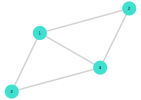

In [12]:
gplot(g, nodelabel=1:4)

The package ignores multiple edges, so will emulate them with weights.

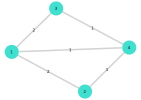

In [13]:
gplot(g,nodelabel=1:4, edgelabel=[2,2,1,1,1] )

In [14]:
# Number of edges and number of vertices
nv(g), ne(g)

(4, 5)

In [15]:
has_edge(g,(1,2))

true

In [16]:
?edges

search: edges in_edges out_edges make_edgestream readedgelist leading_ones



```
edges(g)
```

Return (an iterator to or collection of) the edges of a graph. For `AbstractSimpleGraph`s it returns a `SimpleEdgeIter`. The expressions `e in edges(g)` and `e ∈ edges(ga)` evaluate as calls to [`has_edge`](@ref).

### Implementation Notes

A returned iterator is valid for one pass over the edges, and is invalidated by changes to `g`.


In [17]:
edges(g)

SimpleEdgeIter 5

In [18]:
(1,2) in edges(g), (3,2) in edges(g)

(true, false)

In [19]:
# This is not what we want
A=adjacency_matrix(g)

4×4 SparseMatrixCSC{Int64,Int64} with 10 stored entries:
  [2, 1]  =  1
  [3, 1]  =  1
  [4, 1]  =  1
  [1, 2]  =  1
  [4, 2]  =  1
  [1, 3]  =  1
  [4, 3]  =  1
  [1, 4]  =  1
  [2, 4]  =  1
  [3, 4]  =  1

In [20]:
full(A)

4×4 Array{Int64,2}:
 0  1  1  1
 1  0  0  1
 1  0  0  1
 1  1  1  0

We switch to weighted graph.

In [21]:
g=SimpleWeightedGraph(4)

{4, 0} undirected simple Int64 graph with Float64 weights

In [22]:
add_edge!(g,1,2,2)
# add_edge!(g,1,2,2)
add_edge!(g,1,3,2)
# add_edge!(g,1,3)
add_edge!(g,1,4,1)
add_edge!(g,2,4,1)
add_edge!(g,3,4,1)
g

{4, 5} undirected simple Int64 graph with Float64 weights

In [23]:
has_edge(g,(1,2))

true

In [24]:
edges(g).f((1,2,2))

Edge 1 => 2 with weight 2

In [25]:
# Be carefull!
(1,2) in edges(g).iter, (3,2) in edges(g)

(false, false)

In [26]:
W=weights(g)

4×4 SparseMatrixCSC{Float64,Int64} with 10 stored entries:
  [2, 1]  =  2.0
  [3, 1]  =  2.0
  [4, 1]  =  1.0
  [1, 2]  =  2.0
  [4, 2]  =  1.0
  [1, 3]  =  2.0
  [4, 3]  =  1.0
  [1, 4]  =  1.0
  [2, 4]  =  1.0
  [3, 4]  =  1.0

In [27]:
full(W)

4×4 Array{Float64,2}:
 0.0  2.0  2.0  1.0
 2.0  0.0  0.0  1.0
 2.0  0.0  0.0  1.0
 1.0  1.0  1.0  0.0

In [28]:
no_of_walks=(W^3)[1,2]

22.0

## Pkg.checkout()

The contents of a registered package obtained by the command `Pkg.add("Package_name")` is fixed at the time of registration. 

The package owner may further develop the package, but those changes are not registered (until the registration of a new version). 

If you want to use the latest available version, the command `Pkg.checkout("Package_name")` downloads the latest master.

## Pkg.clone()

Adds unregistered packages or repositories. Here the full GitHub address needs to be supplied.
As an example, we shall use the package [LinearAlgebra.jl](https://github.com/andreasnoack/LinearAlgebra.jl).

N.B. In Julia, the linear algebra routines are incorporated as wrappers of various 
[LAPACK ](http://www.netlib.org/lapack/). This package contains several routines written directly in Julia.

By inspecting the file `src/LinearAlgebra.jl`, we see that nothing is exported so all methods need to be fully specified. We also see that the SVD related stuff may be in the file 
`src/svd.jl`. There we see that the sub-module `SVDModule` is defined, but with nothing eported, and we must specify the full command `LinearAlgebra.SVDModule.svdvals!()`.

We shall compute the singular values of the bidiagonal Jordan form with the standard Julia function `svdvals()` and the function from the package.

In [29]:
# Pkg.clone("https://github.com/andreasnoack/LinearAlgebra.jl")

In [30]:
using LinearAlgebra

In [31]:
# Not much of an information
whos(LinearAlgebra)

                 LinearAlgebra    240 KB     Module
                   numnegevals      0 bytes  LinearAlgebra.#numnegevals


In [32]:
# Also no information
whos(LinearAlgebra.SVDModule) 

                     SVDModule     13 KB     Module


In [33]:
methods(LinearAlgebra.SVDModule.svdvals!)

# 7 methods for generic function "svdvals!":
svdvals!(A::Union{Base.ReshapedArray{T,2,A,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{DenseArray, SubArray{T,N,P,I,true} where I<:Tuple{Union{Base.Slice, UnitRange},Vararg{Any,N} where N} where P where N where T}, DenseArray{T,2}, SubArray{T,2,A,I,L} where L} where I<:Tuple{Vararg{Union{Base.AbstractCartesianIndex, Int64, Range{Int64}},N} where N} where A<:Union{Base.ReshapedArray{T,N,A,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{DenseArray, SubArray{T,N,P,I,true} where I<:Tuple{Union{Base.Slice, UnitRange},Vararg{Any,N} where N} where P where N where T} where N where T, DenseArray}) where T<:Union{Complex{Float32}, Complex{Float64}, Float32, Float64} in Base.LinAlg at linalg/svd.jl:130
svdvals!(A::Union{Base.ReshapedArray{T,2,A,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{DenseArray, SubArray{T,N,P,I,true} where I<:Tuple{Union{Base.Slice, UnitRange},Vararg{Any,N} where N} where P where N where T}, DenseArray{T,2}, SubArray{T,2,A,I,L} where L} where I<:Tuple{Vararg{Union{Base.AbstractCartesianIndex, Int64, Range{Int64}},N} where N} where A<:Union{Base.ReshapedArray{T,N,A,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{DenseArray, SubArray{T,N,P,I,true} where I<:Tuple{Union{Base.Slice, UnitRange},Vararg{Any,N} where N} where P where N where T} where N where T, DenseArray}, B::Union{Base.ReshapedArray{T,2,A,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{DenseArray, SubArray{T,N,P,I,true} where I<:Tuple{Union{Base.Slice, UnitRange},Vararg{Any,N} where N} where P where N where T}, DenseArray{T,2}, SubArray{T,2,A,I,L} where L} where I<:Tuple{Vararg{Union{Base.AbstractCartesianIndex, Int64, Range{Int64}},N} where N} where A<:Union{Base.ReshapedArray{T,N,A,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{DenseArray, SubArray{T,N,P,I,true} where I<:Tuple{Union{Base.Slice, UnitRange},Vararg{Any,N} where N} where P where N where T} where N where T, DenseArray}) where T<:Union{Complex{Float32}, Complex{Float64}, Float32, Float64} in Base.LinAlg at linalg/svd.jl:289
svdvals!(A::Union{Hermitian{Complex{T},S}, Hermitian{T,S}, Symmetric{T,S}} where S where T<:Real) in Base.LinAlg at linalg/symmetric.jl:456
svdvals!(M::Bidiagonal{#s268} where #s268<:Union{Float32, Float64}) in Base.LinAlg at linalg/bidiag.jl:228
svdvals!(B::Bidiagonal{T}) where T<:Real in LinearAlgebra.SVDModule at /home/slap/.julia/v0.6/LinearAlgebra/src/svd.jl:107
svdvals!(B::Bidiagonal{T}, tol; debug) where T<:Real in LinearAlgebra.SVDModule at /home/slap/.julia/v0.6/LinearAlgebra/src/svd.jl:107
svdvals!(A::Union{Base.ReshapedArray{T,2,A,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{DenseArray, SubArray{T,N,P,I,true} where I<:Tuple{Union{Base.Slice, UnitRange},Vararg{Any,N} where N} where P where N where T}, DenseArray{T,2}, SubArray{T,2,A,I,L} where L} where I<:Tuple{Vararg{Union{Base.AbstractCartesianIndex, Int64, Range{Int64}},N} where N} where A<:Union{Base.ReshapedArray{T,N,A,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{DenseArray, SubArray{T,N,P,I,true} where I<:Tuple{Union{Base.Slice, UnitRange},Vararg{Any,N} where N} where P where N where T} where N where T, DenseArray} where T) in LinearAlgebra.SVDModule at /home/slap/.julia/v0.6/LinearAlgebra/src/svd.jl:256

In [34]:
# We now know how to define bidiagonal matrix
methods(Bidiagonal)

# 6 methods for generic function "(::Type)":
(::Type{Bidiagonal})(dv::AbstractArray{T,1} where T, ev::AbstractArray{T,1} where T) in Base.LinAlg at linalg/bidiag.jl:56
(::Type{Bidiagonal})(dv::AbstractArray{T,1}, ev::AbstractArray{T,1}, isupper::Bool) where T in Base.LinAlg at linalg/bidiag.jl:55
(::Type{Bidiagonal})(dv::AbstractArray{T,1} where T, ev::AbstractArray{T,1} where T, uplo::Char) in Base.LinAlg at linalg/bidiag.jl:100
(::Type{Bidiagonal})(dv::AbstractArray{Td,1}, ev::AbstractArray{Te,1}, isupper::Bool) where {Td, Te} in Base.LinAlg at linalg/bidiag.jl:110
(::Type{Bidiagonal})(A::AbstractArray{T,2} where T, isupper::Bool) in Base.LinAlg at linalg/bidiag.jl:145
(::Type{T})(arg) where T in Base at sysimg.jl:77

In [35]:
n=70
c=0.5
J=Bidiagonal(c*ones(n),ones(n-1),true)

70×70 Bidiagonal{Float64}:
 0.5  1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   …   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅   0.5  1.0   ⋅    ⋅    ⋅    ⋅    ⋅       ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅   0.5  1.0   ⋅    ⋅    ⋅    ⋅       ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅   0.5  1.0   ⋅    ⋅    ⋅       ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅   0.5  1.0   ⋅    ⋅       ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅   0.5  1.0   ⋅   …   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.5  1.0      ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.5      ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅       ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅       ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   …   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅       ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    

In [36]:
@time s=svdvals(J);

  0.076652 seconds (15.80 k allocations: 884.637 KiB)


Julia uses convention that function names ending in `!` overwrite the input data.
Thus, we first make a copy of `J`.

In [37]:
J₁=deepcopy(J);

In [38]:
J₀=Bidiagonal([1.0,1,1],[1,1],true)

3×3 Bidiagonal{Float64}:
 1.0  1.0   ⋅ 
  ⋅   1.0  1.0
  ⋅    ⋅   1.0

In [39]:
LinearAlgebra.SVDModule.svdvals!(J₀)

3-element Array{Float64,1}:
 1.80194 
 1.24698 
 0.445042

In [40]:
@time s₁=LinearAlgebra.SVDModule.svdvals!(J₁);

  0.000212 seconds (13 allocations: 9.703 KiB)


In [41]:
typeof(s₁), s₁

(Array{Float64,1}, [1.49967, 1.49867, 1.49701, 1.49468, 1.4917, 1.48805, 1.48375, 1.47879, 1.47318, 1.46693  …  0.576594, 0.561598, 0.547933, 0.535733, 0.525133, 0.516259, 0.509224, 0.504125, 0.501035, 6.35275e-22])

In [42]:
s[70], s₁[70]

(6.352747104407252e-22, 6.352747104407252e-22)

## `Pkg.rm()`

This command removes (deletes) added or cloned packages and all required packages not in use otherwise.

In [43]:
# Pkg.rm("LightGraphs")

In [44]:
# Pkg.rm("LinearAlgebra")

## Creating packages

You need to use GitHub:

1. Go to [GitHub](https://github.com) and `Sign up` and `Sign in`.
2. [Set up Git](https://help.github.com/articles/set-up-git/#platform-windows) at your computer. 

N.B. Check out [GitHub Guides](https://guides.github.com/).

One way to start developing packages is 

1. [Create new repository](https://help.github.com/articles/create-a-repo/) at GitHub.
2. Clone the created package to your computer with
```
git clone https://github.com/your_user_name/your_repository_name.jl
```
3. Start writing your code as described in [Contents of the Package](#contents).
4. Check what you have changed 
```
git commit
```
5. Add changes to be commited with 
```
git add file1 file2 ...
```
6. Commit the changes (you need to supply the message)
```
git commit
```
7. Push the changes to your GitHub repository
```
git push
```

N.B. There are various other possibilities and shorthands (see the Guides).
For example, steps 4., 5. and 6. can be shortened with
```
git commit -am "your message"
```
Also, if you work on your package from two computers, you may need to synchronize your repository: assume that you pushed the changes that you made on computer A to GitHub, and that you want to continue to work on your repository from computer B. Then, you obviously need to synchronize computer B with the latest version from GitHub. This is done with the following commands issued on computer B:
```
git fetch origin
git reset --hard origin/master
git clean -f -d
```



## Be social

You can fork other people's repositories, and use them and change them as your own. You can make pull requests to incorporate those changes to those repositories.

You can easily make different branches of your repository, and test different options.

GitHub enables you to share your work with others, so even small, undocumented packages can be very useful.